In [1]:
import tensorflow as tf

In [2]:
import os

In [3]:
gpus=tf.config.experimental.list_physical_devices('GPU')

In [4]:
len(gpus)

0

In [5]:
# This is to avoid OOM(out of memory) errors because when we use GPU it by default uses up all the available space
for gpu in gpus:
    tf.config.set_memory_growth(gpu,True)

**Removing Dodgy Images**

In [6]:
#import cv2
#import imghdr
image_exts=['png','jpg','jpeg','bmp']

In [7]:

for img_fold in os.listdir('data'):
    for img in os.listdir(os.path.join('data',img_fold)):
        image_path=os.path.join('data',img_fold,img)
        try:
            image=cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("Image doesn't exists {}".format(image_path))
                os.remove(image_path)
        except Exception as ce:
            print('Issue with Image {}'.format(image_path))

Issue with Image data\happy\05-12-21-happy-people.jpg
Issue with Image data\happy\07-120104-happy_people_are_not_nice_people.jpg
Issue with Image data\happy\1-2.jpg
Issue with Image data\happy\1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg
Issue with Image data\happy\11-Habits-of-Truly-Happy-People.jpg
Issue with Image data\happy\154006829.jpg
Issue with Image data\happy\170404-happy-workers-feature.jpg
Issue with Image data\happy\1902539.jpg
Issue with Image data\happy\1902540.jpg
Issue with Image data\happy\1902587.jpg
Issue with Image data\happy\1920px-face-smile.svg_.png.jpg
Issue with Image data\happy\1HEoLBLidT2u4mhJ0oiDgig.png
Issue with Image data\happy\227-2271622_happy-people-business-team-celebrating-png.png
Issue with Image data\happy\60632274._UY200_.jpg
Issue with Image data\happy\7-Habits-of-Happy-People-image.jpeg
Issue with Image data\happy\7-principles-of-successful-and-happy-people.png
Issue with Image data\happy\7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg


In [8]:
### Loading Data ###

In [9]:
#pip install matplotlib

In [10]:
#pip install tf-nightly

**Reading the data**

In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
#importing data from the folder data
data=tf.keras.utils.image_dataset_from_directory('data',batch_size=8) 
                   # image_dataset_from_directory('data')

#getting data from the two folders inside data folder 
data_iterator=data.as_numpy_iterator()

#actually accessing the images inside the folders and distributing them into batches
batch = data_iterator.next()

Found 305 files belonging to 2 classes.


In [13]:
# batch is a list of two first one contains the images and second one contains the labels of the images
len(batch)

2

In [14]:
#Here we can see that each batch size is of 32(which is default) and images are
## automatically reshaped to 256,256,3 which means they are color images and not black and white images
batch[0].shape

(8, 256, 256, 3)

In [15]:
#class 1 = Sad people and class 0 = Happy people
batch[1]

array([0, 0, 0, 0, 1, 0, 0, 1])

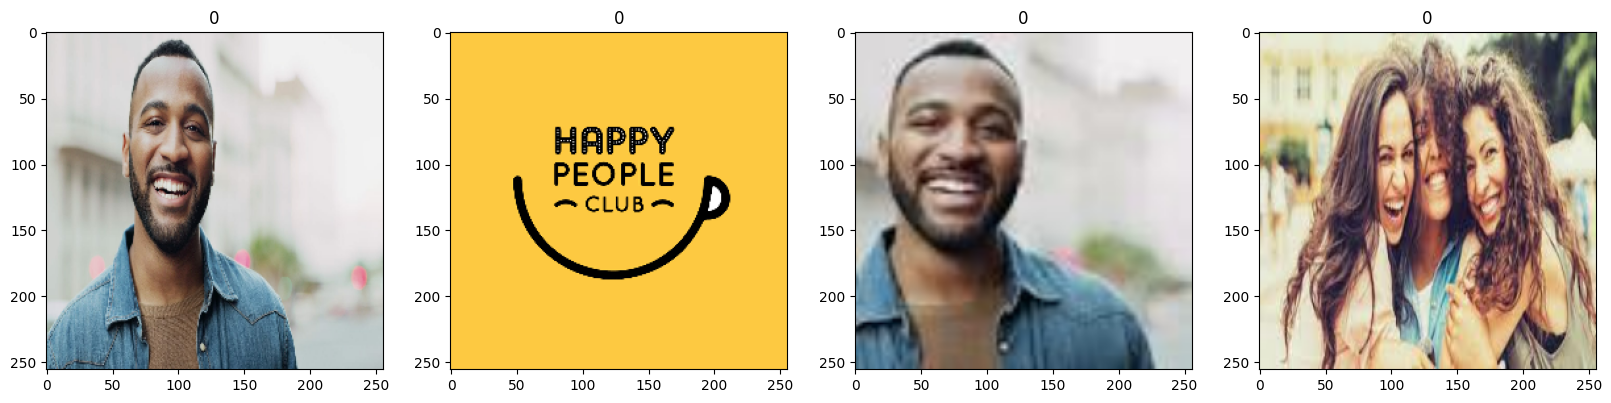

In [16]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [17]:
data=data.map(lambda x,y :(x/255,y))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [18]:
data.as_numpy_iterator().next()

(array([[[[0.91764706, 0.93333334, 0.8039216 ],
          [0.91764706, 0.9319087 , 0.8053462 ],
          [0.91764706, 0.92941177, 0.80784315],
          ...,
          [0.33952206, 0.41403186, 0.32775736],
          [0.35900736, 0.4360141 , 0.34224877],
          [0.37504596, 0.45347732, 0.3554381 ]],
 
         [[0.9159773 , 0.92999387, 0.80726105],
          [0.9159773 , 0.9291758 , 0.80807906],
          [0.9159773 , 0.92774206, 0.8115348 ],
          ...,
          [0.33886328, 0.41504282, 0.32375914],
          [0.35733762, 0.43495095, 0.33936587],
          [0.37337622, 0.4518076 , 0.3508333 ]],
 
         [[0.9140625 , 0.9251532 , 0.81277573],
          [0.9140625 , 0.9251532 , 0.81277573],
          [0.9140625 , 0.9251532 , 0.8174225 ],
          ...,
          [0.33841392, 0.4168453 , 0.31836703],
          [0.35520822, 0.4336396 , 0.33526337],
          [0.3711244 , 0.44955575, 0.34443426]],
 
         ...,
 
         [[0.90588236, 0.9137255 , 0.83137256],
          [0.90588

**Split Data**

In [19]:
train_size = int(len(data)*0.7)
val_size=int(len(data)*0.2)
test_size=int(len(data)*.1)

In [20]:
test_size

3

In [21]:
# Distributiong the data into training, validation & testing.
train=data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

<B>Training the Dataset<B>

In [22]:
#importing all the required dependencies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

<B> Training the Model</b>

In [27]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
27/27 [==============================] - 14s 430ms/step - loss: 0.7562 - accuracy: 0.6019 - val_loss: 0.6574 - val_accuracy: 0.8036
Epoch 2/20
27/27 [==============================] - 11s 411ms/step - loss: 0.5908 - accuracy: 0.7824 - val_loss: 0.4217 - val_accuracy: 0.8571
Epoch 3/20
27/27 [==============================] - 11s 411ms/step - loss: 0.4232 - accuracy: 0.8009 - val_loss: 0.4187 - val_accuracy: 0.8036
Epoch 4/20
27/27 [==============================] - 11s 409ms/step - loss: 0.2524 - accuracy: 0.9167 - val_loss: 0.2498 - val_accuracy: 0.8393
Epoch 5/20
27/27 [==============================] - 11s 408ms/step - loss: 0.1726 - accuracy: 0.9306 - val_loss: 0.3795 - val_accuracy: 0.8214
Epoch 6/20
27/27 [==============================] - 11s 412ms/step - loss: 0.1583 - accuracy: 0.9259 - val_loss: 0.2665 - val_accuracy: 0.9107
Epoch 7/20
27/27 [==============================] - 11s 412ms/step - loss: 0.0769 - accuracy: 0.9769 - val_loss: 0.2410 - val_accuracy: 0.8393

<B> Performance Analyse</B>

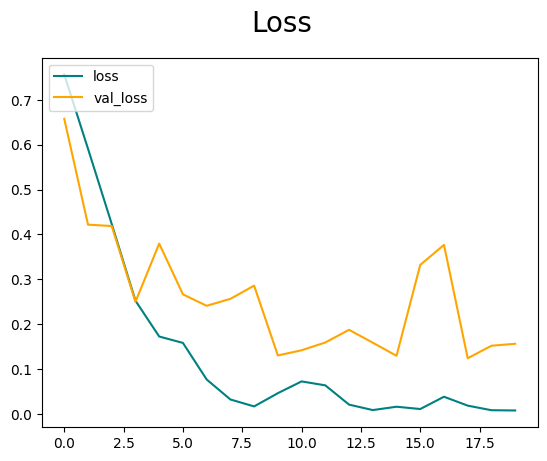

In [28]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

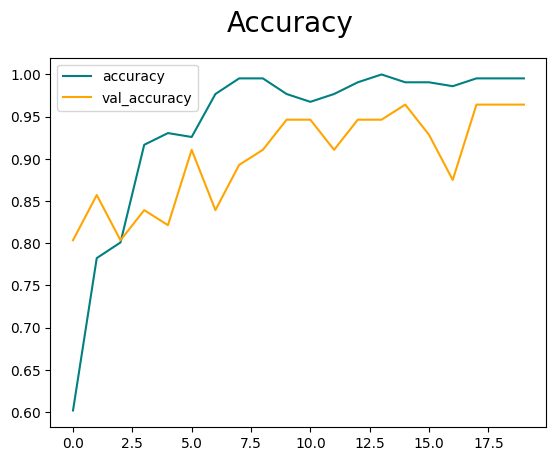

In [29]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

<B>Evaluate</B>

In [30]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [31]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [32]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 120ms/step


In [33]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.85714287, shape=(), dtype=float32) tf.Tensor(0.9583333, shape=(), dtype=float32)


<B> Saving the Model</b>

In [34]:
from tensorflow.keras.models import load_model

In [35]:
model.save(os.path.join('models','imageclassifier.h5'))

In [36]:
new_model = load_model('imageclassifier.h5')

OSError: No file or directory found at imageclassifier.h5

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))